<a href="https://colab.research.google.com/github/WsThus07/MNIST_with_ANN/blob/main/mnistAnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

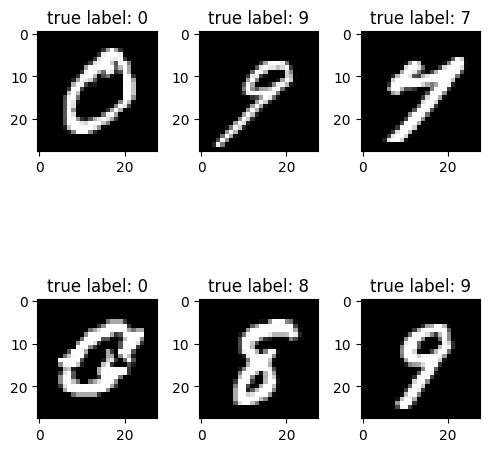

train_x.shape:  (60000, 28, 28)
train_y.shape: (60000,)
test_x.shape: (10000, 28, 28)
test_y.shape: (10000,)


In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

def plot_digit(ax, X, y, idx):
    img = X[idx].reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.set_title('true label: %d' % y[idx])

# Loading Data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Create a figure and axis objects
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(5, 6))

# Plot digits in subplots
for i, ax in zip(range(1, 60000, 500), axs.flatten()):
    plot_digit(ax, train_x, train_y, i)

# Adjust layout
plt.tight_layout()
plt.show()

print("train_x.shape: ", train_x.shape)
print("train_y.shape:", train_y.shape)
print("test_x.shape:", test_x.shape)
print("test_y.shape:", test_y.shape)


In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)
#convert a class vector to binary matrix(One-hot encoding)
train_y= keras.utils.to_categorical(train_y,10)
test_y= keras.utils.to_categorical(test_y,10)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#building model
model = Sequential()
model.add(Dense(units=128, activation="relu", input_shape=(784,)))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(optimizer=SGD(0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(train_x, train_y, batch_size=32, epochs=10, verbose=1)
model.save("mnist_model.h5")




Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.9930 - accuracy: 0.8561
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2721 - accuracy: 0.9265
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1920 - accuracy: 0.9459
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1483 - accuracy: 0.9556
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1230 - accuracy: 0.9626
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1029 - accuracy: 0.9686
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888 - accuracy: 0.9726
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9768
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.057

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#loading model and visualization

model = Sequential()
model.add(Dense(units=128, activation="relu", input_shape=(784,)))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.compile(optimizer=SGD(0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.load_weights("mnist_model.h5")
accuracy =model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ", accuracy[1])
print(model.summary())

313/313 [==============================] - 1s 2ms/step - loss: 0.1987 - accuracy: 0.9508
Accuracy:  0.9508000016212463
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


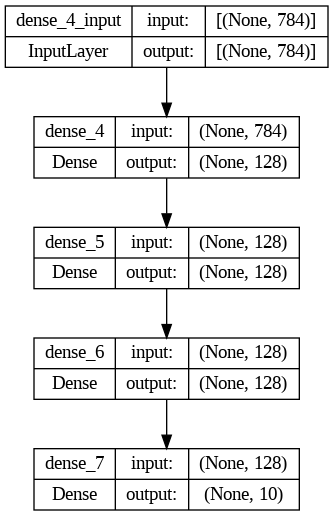

In [ ]:
from keras.utils import plot_model  # Updated import

# Assuming 'model' is your Keras model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Prediction

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



1/1 [==============================] - 0s 153ms/step
Class:  [2]


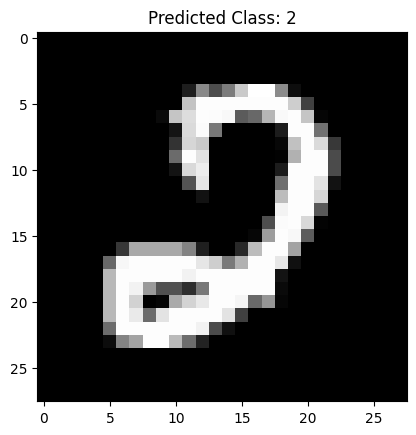

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#choosing an image from test
img = test_x[400]
test_img = img.reshape((1, 784))  # Assuming your model is designed for 2D input

# Assuming your model has softmax activation in the output layer
raw_predictions = model.predict(test_img)
predicted_class = np.argmax(raw_predictions, axis=-1)

print("Class: ", predicted_class)

img = img.reshape((28, 28))
plt.imshow(img, cmap="gray")
plt.title(f"Predicted Class: {predicted_class[0]}")
plt.show()

1/1 [==============================] - 0s 36ms/step
Class:  2


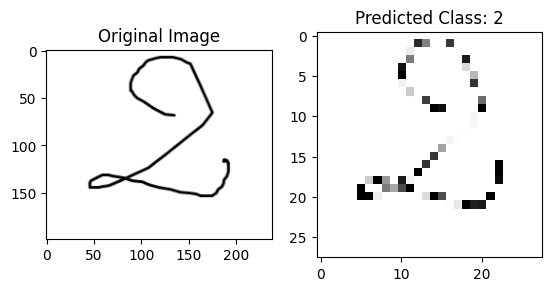

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from the file path
img_path = "p1.png"
img = image.load_img(path=img_path, color_mode="grayscale", target_size=(28, 28))
img_array = image.img_to_array(img)
# Flatten the image array
test_img = img_array.reshape((1, 784))  # Assuming your model expects flattened input
# Assuming your model has softmax activation in the output layer
raw_predictions = model.predict(test_img)
predicted_class = np.argmax(raw_predictions, axis=-1)
classname = str(predicted_class[0])
print("Class: ", classname)
# Reshape the original image
img_array = img_array.reshape((28, 28))
# Create a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread(img_path), cmap="gray")
plt.title("Original Image")
# Reshape the image with predicted class
plt.subplot(1, 2, 2)
plt.imshow(img_array, cmap="gray")
plt.title(f"Predicted Class: {classname}")
plt.show()

In [ ]:
# prompt: afficher l accuracy de cette prediction

accuracy =model.evaluate(x=train_x,y=train_y,batch_size=32)
print("Accuracy: ", accuracy[1])


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9842
Accuracy:  0.98416668176651


In [ ]:
# prompt: afficher l accuracy de cette prediction

accuracy =model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ", accuracy[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.1987 - accuracy: 0.9508
Accuracy:  0.9508000016212463
